In [1]:
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('image1083.jpg')

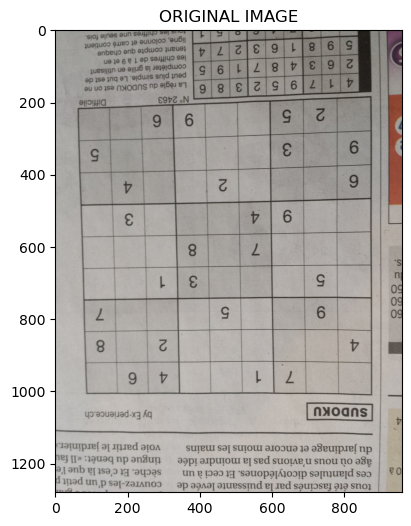

In [3]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('ORIGINAL IMAGE')
plt.show()

In [4]:
rotated_image = cv2.rotate(image, cv2.ROTATE_180)

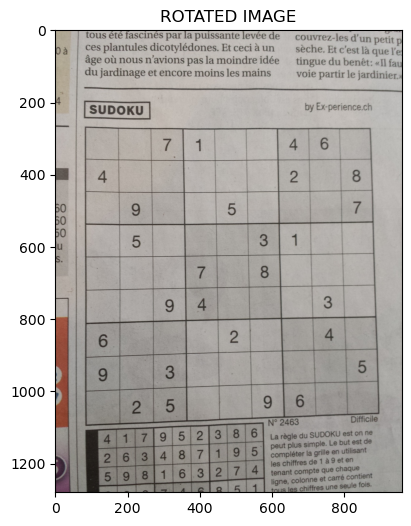

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('ROTATED IMAGE')
plt.show()

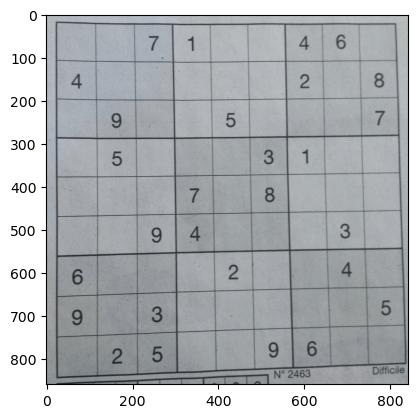

In [6]:
image = rotated_image[250:1110,60:901]
crop = copy.deepcopy(image)
plt.imshow(crop)
plt.show()

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

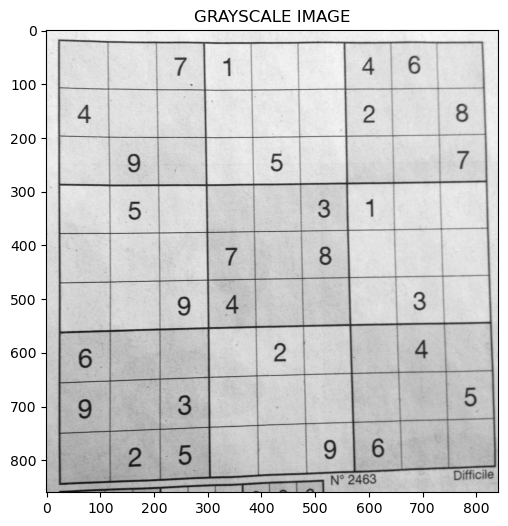

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(gray, cmap='gray')
plt.title('GRAYSCALE IMAGE')
plt.show()

In [9]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

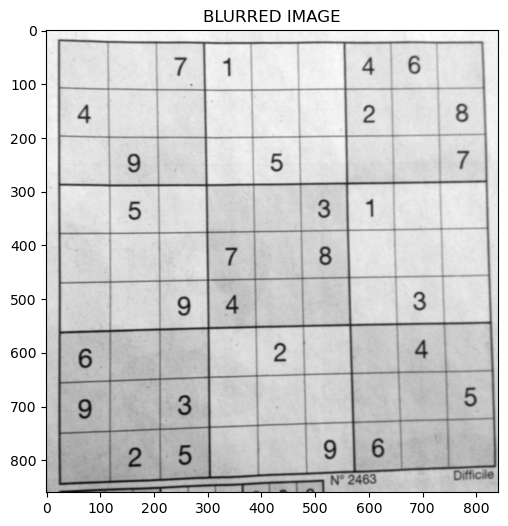

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(blurred, cmap='gray')
plt.title('BLURRED IMAGE')
plt.show()

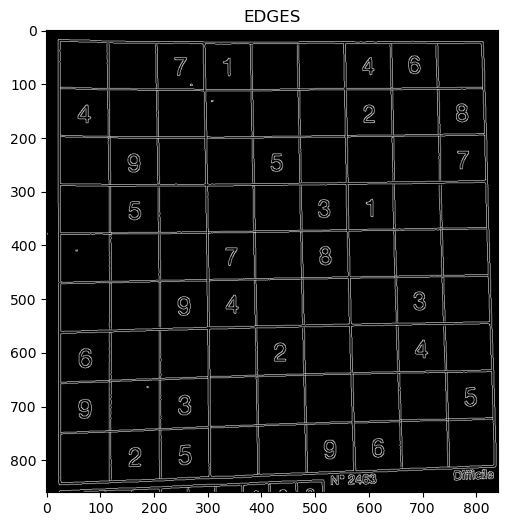

In [11]:
edges = cv2.Canny(blurred, 50, 100)

plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('EDGES')
plt.show()

In [12]:
import easyocr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


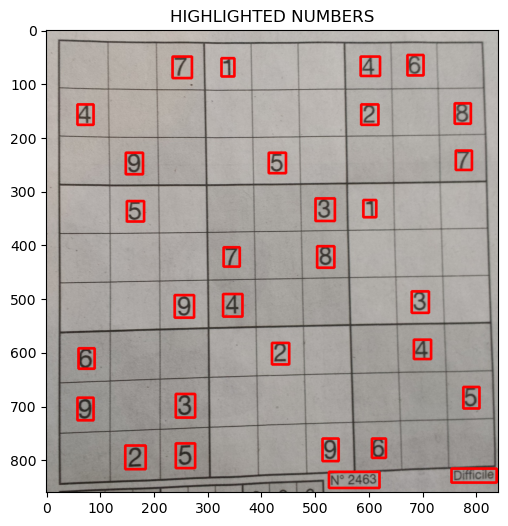

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(blurred)

for detection in result:
    box = detection[0]
    text = detection[1]
    x1, y1 = box[0][0], box[0][1]
    x2, y2 = box[2][0], box[2][1]
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)

num = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
plt.figure(figsize=(8, 6))
plt.imshow(num)
plt.title('HIGHLIGHTED NUMBERS')
plt.show()

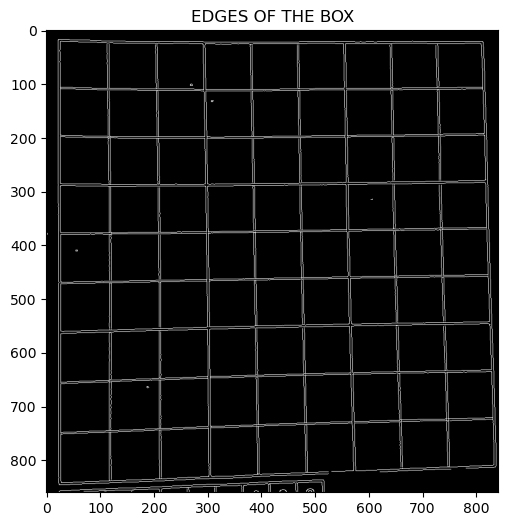

In [14]:
mask = np.ones_like(edges) * 255

for detection in result:
    box = detection[0]
    x1, y1 = box[0][0], box[0][1]
    x2, y2 = box[2][0], box[2][1]
    cv2.rectangle(mask, (x1, y1), (x2, y2), (0, 0, 0), cv2.FILLED)

masked_image = cv2.bitwise_and(edges, mask)

plt.figure(figsize=(8, 6))
plt.imshow(masked_image, cmap='gray')
plt.title('EDGES OF THE BOX')
plt.show()

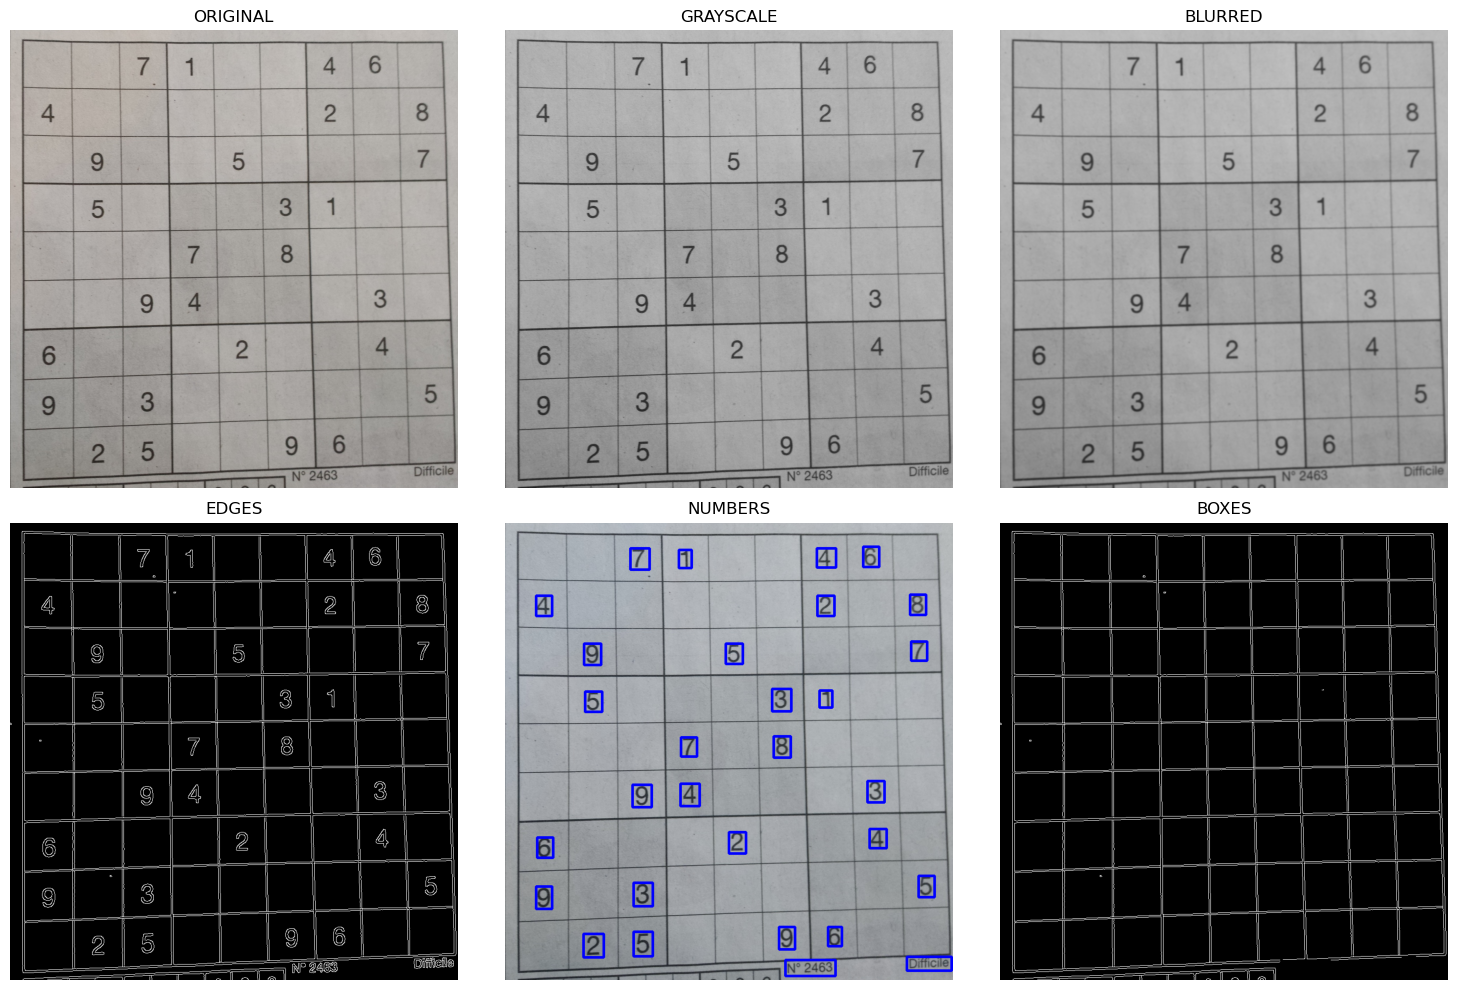

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the images
axs[0, 0].imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('ORIGINAL')

axs[0, 1].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('GRAYSCALE')

axs[0, 2].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('BLURRED')

axs[1, 0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('EDGES')

axs[1, 1].imshow(cv2.cvtColor(num, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('NUMBERS')

axs[1, 2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title('BOXES')

for ax in axs.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()